In [1]:
""" 제 3고지 고차 미분 계산 """

' 제 3고지 고차 미분 계산 '

In [2]:
""" STEP25. 계산 그래프 시각화 ( 1 ) """

' STEP25. 계산 그래프 시각화 ( 1 ) '

In [3]:
""" STEP26. 계산 그래프 시각화 ( 2 ) """

import numpy as np
from dezero import Variable
from dezero.utils import get_dot_graph

x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1 # 어떤 계산

# 변수 이름 지정
x0.name = 'x0'
x1.name = 'x1'
y.name = 'y'

txt = get_dot_graph(y, verbose=False)
print(txt)

with open('sample_26.dot', 'w') as o:
    o.write(txt)

digraph g {
2414475127904 [label="y", color=orange, style=filled]
2415049847200 [label="Add", color=lightblue, style=filled, shape=box]
2414454507520 -> 2415049847200
2414475132608 -> 2415049847200
2415049847200 -> 2414475127904
2414454507520 [label="x0", color=orange, style=filled]
2414475132608 [label="x1", color=orange, style=filled]
}


In [4]:
def _dot_var(v, verbose=False):
    # 노드의 속성을 정의하는 문자열 템플릿
    dot_var = '{} [label="{}", color=orange, style=filled]\n'

    # 변수의 이름과 데이터 타입을 가져옴
    name = '' if v.name is None else v.name  # 변수의 이름이 없으면 빈 문자열을 사용
    # verbose 모드가 활성화되어 있고 변수의 데이터가 있으면
    if verbose and v.data is not None:
        # 변수의 이름과 변수의 데이터 형태와 데이터 타입을 문자열에 추가
        if v.name is not None:
            name += ': '  # 변수의 이름이 있으면 콜론과 공백을 추가
        name += str(v.shape) + ' ' + str(v.dtype)  # 변수의 형태와 데이터 타입을 추가
    # 노드의 속성 문자열을 포맷하여 반환
    return dot_var.format(id(v), name)

In [5]:
x = Variable(np.random.randn(2, 3))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose=True))

2414475624624 [label="x", color=orange, style=filled]

2414475624624 [label="x: (2, 3) float64", color=orange, style=filled]



In [6]:
def _dot_func(f):
    dot_func = '{} [lable="{}", \
    color=lightblue, style=filled, shape=box]\n'
    txt = dot_func.format(id(f), f.__class__.__name__)

    dot_edge = '{} -> {}\n'
    for x in f.inputs:
        txt += dot_edge.format(id(x), id(f))
    for y in f.outputs:
        txt += dot_edge.format(id(f), id(y())) # y는 약한 참조
    return txt

In [7]:
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1
txt = _dot_func(y.creator)
print(txt)

2414475411184 [lable="Add",     color=lightblue, style=filled, shape=box]
2415050254880 -> 2414475411184
2414475408832 -> 2414475411184
2414475411184 -> 2414475405424



In [8]:
def get_dot_graph(output, verbose=True):
    txt = ''
    funcs = []
    seen_set = set()

    def add_func(f):
        if f not in seen_set:
            funcs.append(f)
            # funcs.sort(key=lambda x: x.generation)

    add_func(output, creator)
    txt += _dot_var(output, verbose)

    while funcs:
        func = funcs.pop()
        txt += _dot_func(func)
        for x in func.inputs:
            txt += _dot_var(x, verbose)

            if x.creator is not None:
                add_func(x.creator)

    return 'digraph g {\n' + txt + '}'

In [9]:
# import os
# import subprocess

# def plot_dot_graph(output, verbose=True, to_file='graph.png'):
#     dot_graph = get_dot_graph(output, verbose)

#     tmp_dir = os.path.join(os.path.expanduser('~'), '.dezero')
#     if not os.path.exists(tmp_dir): # ~/.dezero 디렉터리가 없다면 새로 생성
#         os.mkdir(tmp_dir)
#     graph_path = os.path.join(tmp_dir, 'tmp_graph.dot')

#     with open(graph_path, 'w') as f:
#         f.write(dot_graph)

#     extenstion = os.path.splitext(to_file)[1][1:] # 확장자( png, pdf 등 )
#     cmd = 'dot {} -T {} -o {}'.format(graph_path, extenstion, to_file)
#     subprocess.run(cmd, shell=True)

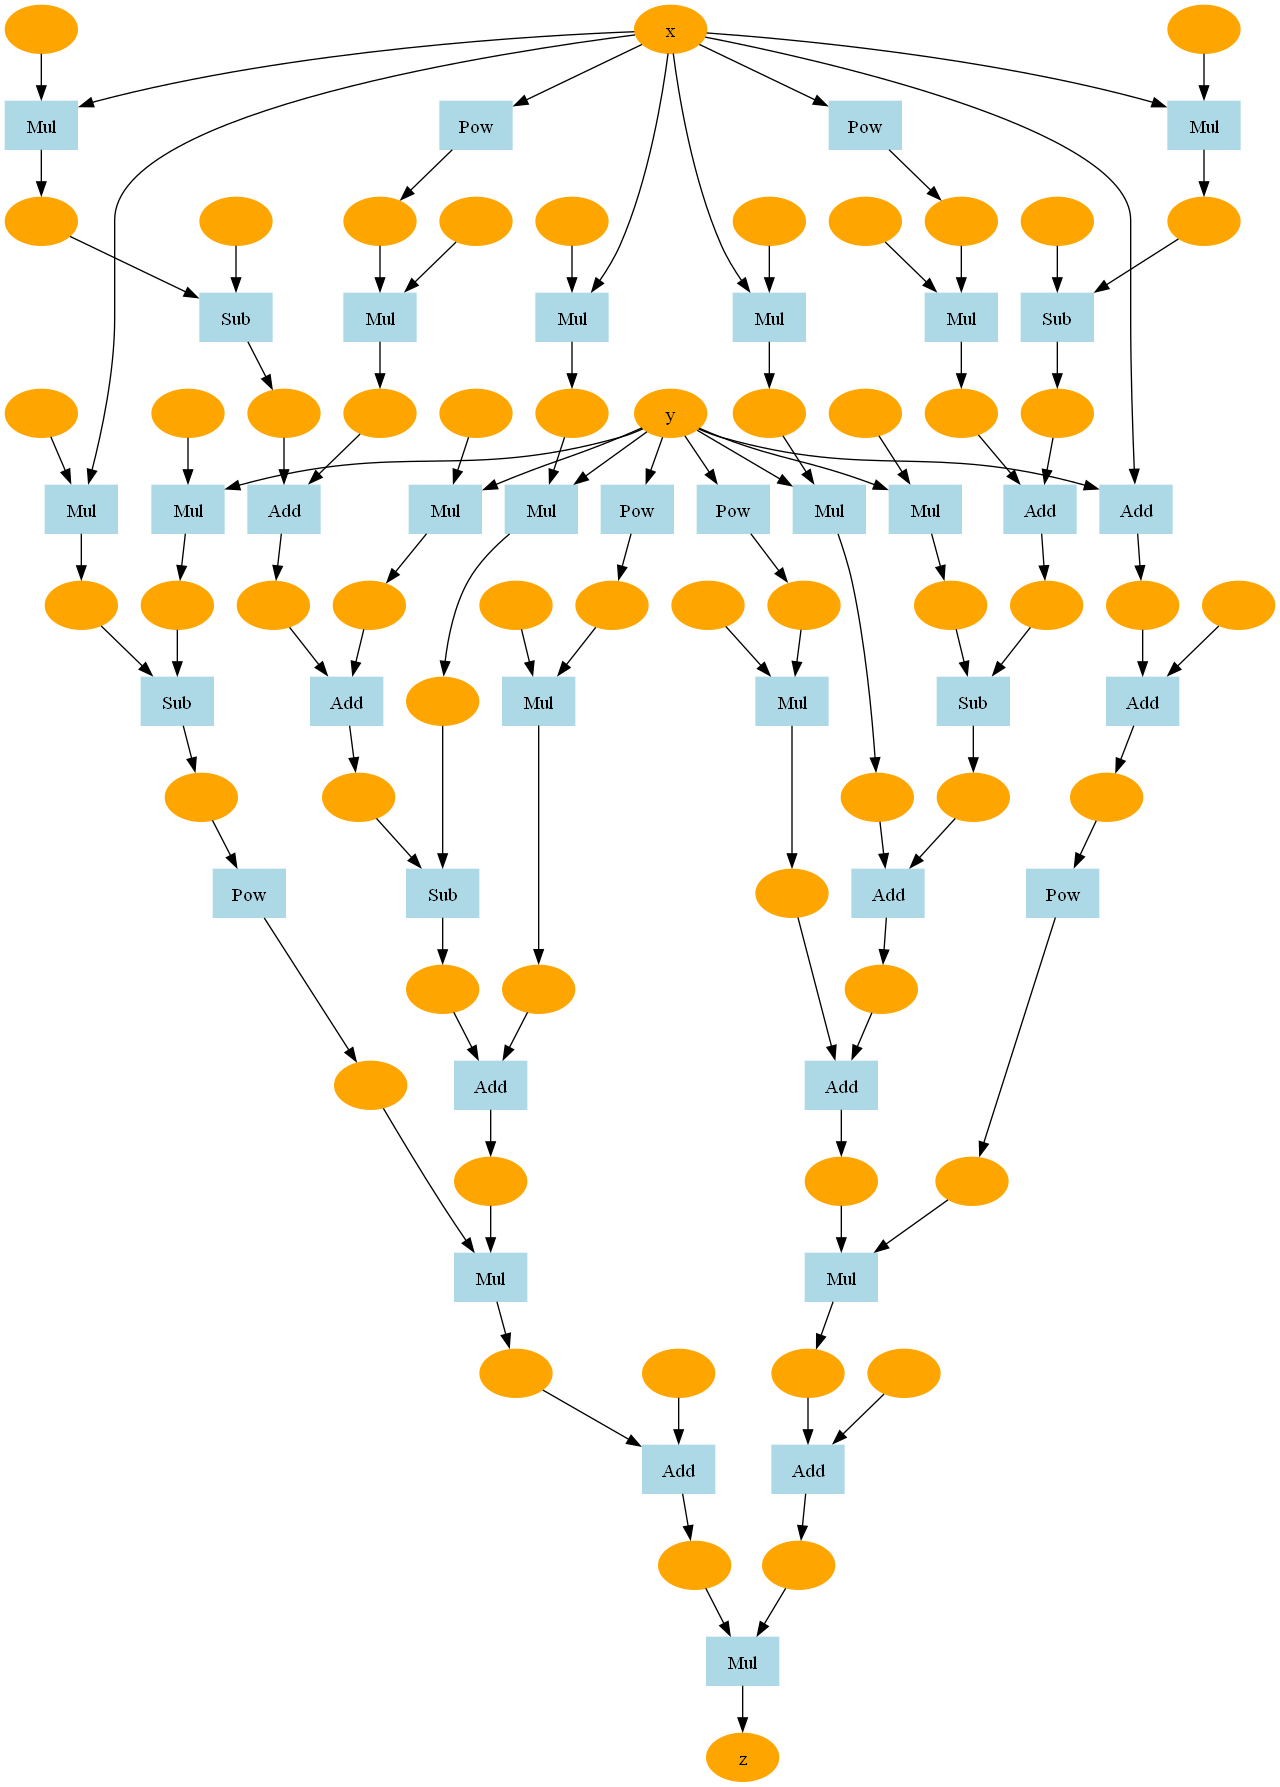

In [10]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

def goldstein(x, y):
    z = (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * \
        (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()
# print(x.grad, y.grad)

x.name = 'x'
y.name = 'y'
z.name = 'z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')